# Ejercicios Pair Programming 
## Lección 4 - Tratamiento para ML de Asunciones

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [17]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
# Establecer tamaño gráficas
plt.rcParams["figure.figsize"] = (10,10)

# Warning
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv("supermercado_limpio.csv", index_col=0)

In [19]:
df.head()

,id,year_birth,education,marital_status,income,dt_customer,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,Graduation,Divorced,84835.0,6/16/2014,1,4,6,1
1,1,1961,Graduation,Single,57091.0,6/15/2014,1,7,7,5
2,10476,1958,Graduation,Married,67267.0,5/13/2014,1,3,5,2
3,1386,1967,Graduation,Together,32474.0,11/5/2014,1,1,2,7
4,5371,1989,Graduation,Single,21474.0,8/4/2014,2,3,2,7


El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:

Normalidad (ya la deberíais haber evaluado)

Homogeneidad de varianzas

Independencia de las variables

Cada asunción la deberéis testar de forma visual y analítica.

Happy coding 📈📊📉

#### Normalidad

Partiendo de esta base:

Hipotesis nula = los datos son normales

Hipotesis alternativa = los datos no son normales

##### Gráficamente

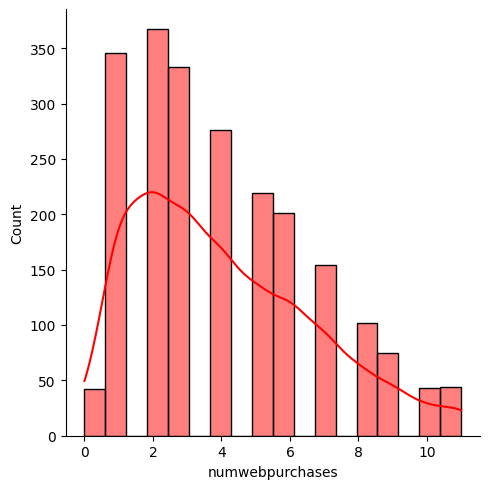

In [20]:
sns.displot(df["numwebpurchases"], kde = True, color = "red");

Podemos apreciar en esta gráfica que nuestra variable respuesta no presenta una distribución normal, es decir, su asimetría es positiva y sesgada a la derecha.

##### Analíticamente

In [21]:
# Shapiro

stats.shapiro(df["numwebpurchases"])

ShapiroResult(statistic=0.9306982755661011, pvalue=8.496315181302744e-31)

Al ser el valor de nuestro p-value inferior a 0.05 nos reafirma, con un 95%  que rechazamos la hipotesis nula y aceptamos la hipotesis alternativa, es decir, nuestros datos no son normales.

#### Homogeneidad de varianzas

Partiendo de esta base:

Hipotesis nula = los datos presentan homocedasticidad

Hipotesis alternativa = los datos presentan heterocedasticidad

##### Gráficamente variables categóricas

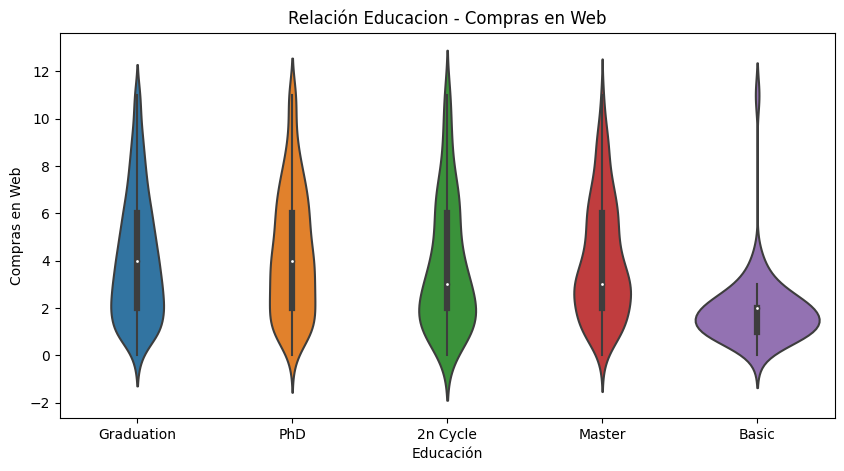

In [22]:
# Comprobamos primero de manera gráfica las variables categóricas

# violin plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.violinplot(
    x       = "education",
    y       = "numwebpurchases",
    data    = df,
    palette = "tab10",
    ax      = ax
)
ax.set_title("Relación Educacion - Compras en Web")
ax.set_ylabel("Compras en Web")
ax.set_xlabel("Educación");

Visualizando gráficamente la relación entre compras en web y educación de los compradores vemos que tanto "Graduation" como "PhD" la mediana es similar, al igual que "2n Cycle" y "Master", siendo inferior la mediana si la educación es más básica.
En cuanto a la densidad también es similiar la forma de los violin entre los cuatro primeros siendo "Basic" llamativamente diferente.

Concluimos que tanto "Graduation", "PhD", "2n Cycle" y "Master" tienen compras en web parecidas y superiores a "Basic".

##### Analíticamente variables categóricas

In [23]:
df["education"].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [24]:
# extraemos los distintos dataframes que necesitaremos

graduacion = df[df["education"] == 'Graduation']["numwebpurchases"]
phd = df[df["education"] == 'PhD']["numwebpurchases"]
doscycle = df[df["education"] == '2n Cycle']["numwebpurchases"]
master = df[df["education"] == 'Master']["numwebpurchases"]
basic = df[df["education"] == "Basic"]["numwebpurchases"]

In [25]:
# Utilizamos Levene Test porque es más robusto ante la falta de normalidad que presentan nuestras variables
# ==============================================================================
levene_test = stats.levene(graduacion, phd, doscycle, master, basic, center="median")
levene_test

LeveneResult(statistic=8.916061745705452, pvalue=3.855433277735663e-07)

Tras realizar el analísis de forma analítica con el Test Levene, encontramos que todos los grupos de nuestra variable categórica "education" su p-valor es inferior es 0.05, por lo tanto rechaza la hipotesis nula, es decir, cumple la hipotesis alternativa de heterocedasticidad.

##### Gráficamente variables numéricas

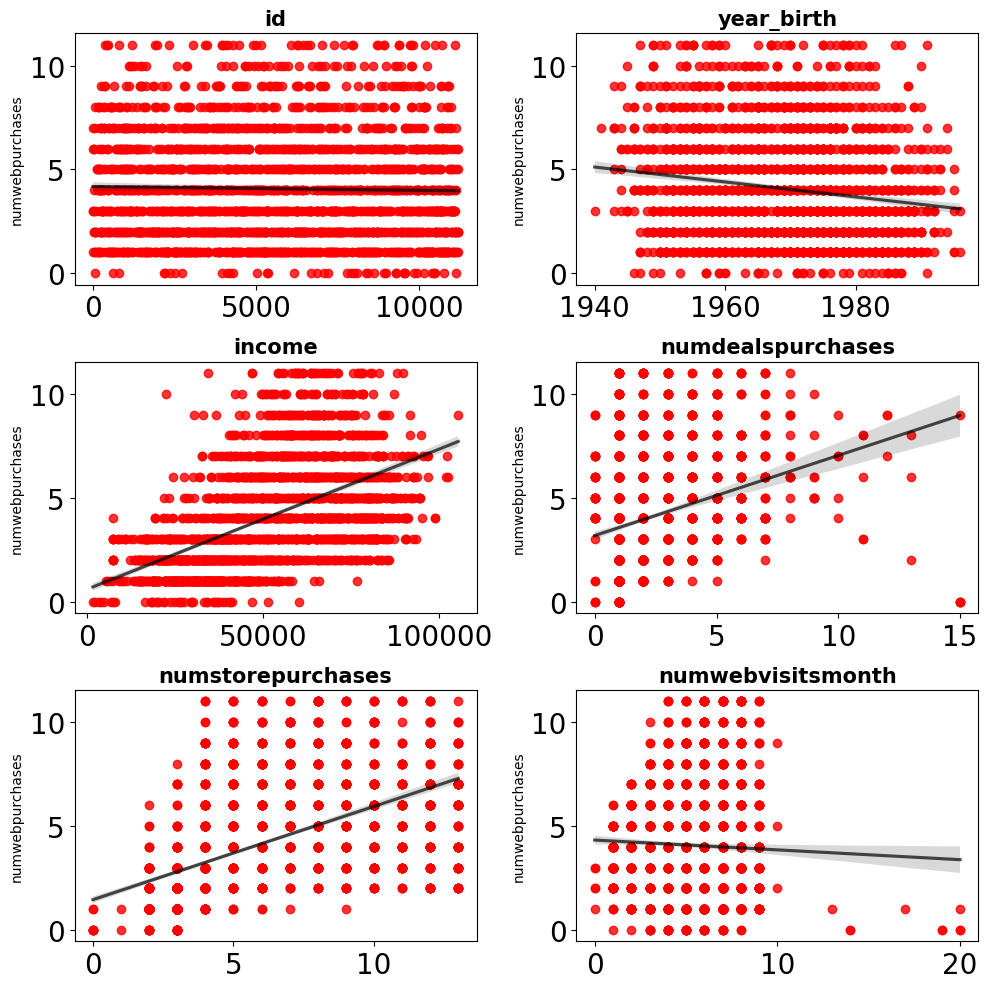

In [27]:
# iniciamos los subplots para relacionar graficamente nuestras variables numéricas con la variable respuesta
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))
axes = axes.flat

columnas_numericas = df.select_dtypes(include = np.number).drop("numwebpurchases", axis=1)
columnas_numericas = columnas_numericas.columns

for i, colum in enumerate(columnas_numericas): 
    sns.regplot(
        data = df,
        x = colum,
        y = "numwebpurchases",
        color = "red",
        line_kws = {"color": "black", "alpha": 0.7 }, 
        ax = axes[i])
      
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
fig.tight_layout();

Viendo este gráfico podemos apreciar en la relacion "numwebvisitsmonth" y "numwebpurchases" que el numero de visitas por web al mes y compras online están muy relacionadas ya que la linea es bastante recta, es decir, suele pasar que si se realiza la visita a la web al mes también se realiza la compra online. Se ve claramente que no tiene una densidad muy alta pero en terminos generales vemos que la gente que realiza la visita, compra.

Por otro lado en la relación "income" y "numwebpurchases" vemos que tiene una densidad alta y apreciamos en la gráfica como a más ingresos, más compras online.

#### Analíticamente variables numéricas

In [28]:
# definimos un dataframe solo con las variables numéricas.

numericas = df.select_dtypes(include = np.number)
numericas.head(2)

,id,year_birth,income,numdealspurchases,numwebpurchases,numstorepurchases,numwebvisitsmonth
0,1826,1970,84835.0,1,4,6,1
1,1,1961,57091.0,1,7,7,5


In [29]:
# creamos un diccionario para almacenar los resultados de los test.
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de compras en web.
numericas_col = df.select_dtypes(include = np.number).drop("numwebpurchases", axis = 1).columns

#iteramos por la lista de las columnas numéricas.
for col in numericas_col:
    # calculamos el p-valor de test.
    statistic, p_val = stats.levene(df[col], df["numwebpurchases"], center="median")
    # lo almacenamos en el diccionario.
    resultados[col] = p_val

In [30]:
resultados

{'id': 0.0,
 'year_birth': 0.0,
 'income': 0.0,
 'numdealspurchases': 1.7594574004723406e-82,
 'numstorepurchases': 1.1061745067251979e-19,
 'numwebvisitsmonth': 7.758708068798546e-05}

Tras realizar el Test de Levene vemos que todas nuestras variables numéricas al ser menores que 0.05 no cumplen esta asunción, por lo tanto presentan heterocedasticidad, es decir, las varianzas de nuestras variables varían entre los diferentes niveles.

#### Independencia de las variables

Partiendo de esta base:

Hipotesis nula = variables son independientes

Hipotesis alternativa = variables son dependientes

##### Analíticamente para variables categóricas

In [31]:
# Comparamos en este caso las variables categóricas "education" y "marital_status"
crosstab, test_results, expected = rp.crosstab(df["education"], df["marital_status"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

In [32]:
crosstab.head()

marital_status                                               \
marital_status         Absurd Alone Divorced Married Single Together Widow   
education                                                                    
2n Cycle                 0.00  0.00     1.00    3.63   1.59     2.54  0.23   
Basic                    0.00  0.00     0.05    0.91   0.82     0.64  0.05   
Graduation               0.05  0.05     5.36   19.44  11.17    12.85  1.59   
Master                   0.05  0.05     1.68    6.27   3.41     4.59  0.50   
PhD                      0.00  0.05     2.36    8.49   4.27     5.18  1.09   

                             
marital_status  YOLO    All  
education                    
2n Cycle        0.00   8.99  
Basic           0.00   2.45  
Graduation      0.00  50.50  
Master          0.00  16.53  
PhD             0.09  21.53

In [33]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 28.0) =,27.3354
1,p-value =,0.5000
2,Cramer's V =,0.0557


Visualizando el test_results vemos que nuestro p-valor es mayor que 0.05, por lo tanto, nuestras variables son independientes entre ellas al no poder rechazar la hipotesis nula.

Concluimos que las variables "education" y "status_marital" no están relacionadas de forma que dependan una de la otra.

Happy coding💪🏽